In [ ]:
! pip install pydub

44100


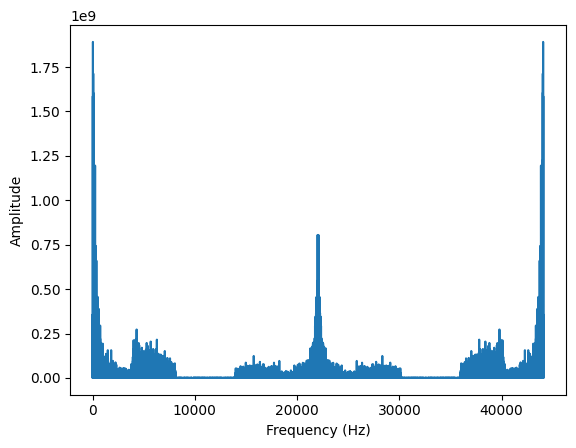

Fundamental frequency 1: 1.38 Hz (amplitude 1100951835.38)
Fundamental frequency 2: 5.49 Hz (amplitude 603256781.54)
Fundamental frequency 3: 4.03 Hz (amplitude 495728339.34)
Fundamental frequency 4: 3.38 Hz (amplitude 326235656.18)
Fundamental frequency 5: 7.35 Hz (amplitude 456149289.20)


In [ ]:
from pydub import AudioSegment
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

# Load audio signal
path = "/content/drive/MyDrive/Colab Notebooks/sound.mp3"
audio = AudioSegment.from_file(path, format="mp3")
samples = np.array(audio.get_array_of_samples())
fs = audio.frame_rate
print('fs: ',fs)

# Perform FFT
fft_out = fft(samples)

# Plot the frequency spectrum
magnitude = np.abs(fft_out)
frequency = np.linspace(0, fs, len(magnitude))

plt.plot(frequency, magnitude)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.show()

# Define the frequency range for each fundamental frequency
fundamental_frequencies = [100, 200, 300, 400, 500]
frequency_ranges = [(f - 10, f + 10) for f in fundamental_frequencies]

# Separate the different frequencies
frequency_components = []
for low, high in frequency_ranges:
    index_range = np.logical_and(frequency >= low, frequency <= high)
    frequency_component = magnitude[index_range]
    frequency_components.append(frequency_component)

# Output each of the fundamental frequencies
for i, (low, high) in enumerate(frequency_ranges):
    component = frequency_components[i]
    index_max = np.argmax(component)
    frequency_max = frequency[index_max]
    amplitude_max = component[index_max]
    print(f"Fundamental frequency {i + 1}: {frequency_max:.2f} Hz (amplitude {amplitude_max:.2f})")

In [ ]:
import librosa
import numpy as np
import pydub
from scipy.io.wavfile import write

# Load .mp3 file
path = "/content/drive/MyDrive/Colab Notebooks/veer-zaara.mp3"
audio = AudioSegment.from_file(path, format="mp3")
# Save .wav file
wav_filename = "audio_signal.wav"
audio.export(wav_filename, format="wav")

# Load .wav file
samples, sr = librosa.load(wav_filename)

# Perform Short-Time Fourier Transform (STFT)
stft = np.abs(librosa.stft(samples))

# Define the frequency ranges for the vocal, bass, and lead
vocal_range = (100, 300)
bass_range = (20, 100)
lead_range = (300, 5000)

# Separate the different frequency components
vocal_stft = stft.copy()
vocal_stft[(stft <= vocal_range[0]) | (stft > vocal_range[1])] = 0

bass_stft = stft.copy()
bass_stft[(stft <= bass_range[0]) | (stft > bass_range[1])] = 0

lead_stft = stft.copy()
lead_stft[(stft <= lead_range[0]) | (stft > lead_range[1])] = 0

# Convert the STFTs back to the time domain
vocal = librosa.istft(vocal_stft)
bass = librosa.istft(bass_stft)
lead = librosa.istft(lead_stft)

# Output each of the separated signals
write("vocal.wav", sr, vocal)
write("bass.wav", sr, bass)
write("lead.wav", sr, lead)